In [ ]:
# To connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2 as cv
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Rescaling,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Project/Dataset/Train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(100, 100),
  batch_size=128,label_mode='categorical',)

Found 22429 files belonging to 10 classes.
Using 17944 files for training.


In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Project/Dataset/Train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(100, 100),
  batch_size=128,label_mode='categorical',)

Found 22429 files belonging to 10 classes.
Using 4485 files for validation.


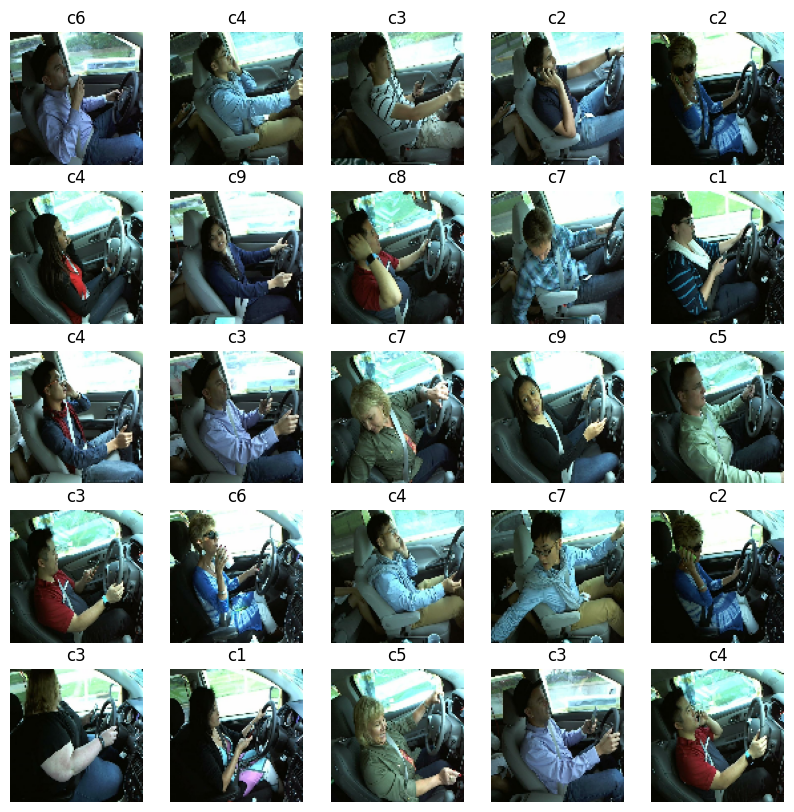

In [ ]:
classes = train_data.class_names
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_data.take(1):
    labels = labels.numpy()
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i].argmax()])
        plt.axis("off")

In [ ]:
# creating our model
model = tf.keras.models.Sequential([
    Rescaling(scale = 1/255,input_shape=(100,100,3)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.1),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.1),
    Flatten(),
    Dense(1024,activation='relu'),
    Dropout(0.1),
    Dense(512,activation='relu'),

    Dense(256,activation='relu'),
    Dropout(0.1),
    Dense(10,activation='softmax'),
])

# compiling our model
model.compile(optimizer = Adam(lr=0.01),loss = 'categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                   

In [ ]:
es = EarlyStopping(monitor='val_acc',min_delta=0.01,patience=2)

In [ ]:
history = model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
141/141 [==============================] - 4551s 32s/step - loss: 1.1087 - acc: 0.6088 - val_loss: 0.2397 - val_acc: 0.9309
Epoch 2/10
141/141 [==============================] - 94s 639ms/step - loss: 0.1574 - acc: 0.9517 - val_loss: 0.1055 - val_acc: 0.9686
Epoch 3/10
141/141 [==============================] - 82s 562ms/step - loss: 0.0756 - acc: 0.9765 - val_loss: 0.0823 - val_acc: 0.9773
Epoch 4/10
141/141 [==============================] - 82s 561ms/step - loss: 0.0512 - acc: 0.9829 - val_loss: 0.0586 - val_acc: 0.9848
Epoch 5/10
141/141 [==============================] - 53s 361ms/step - loss: 0.0343 - acc: 0.9887 - val_loss: 0.0661 - val_acc: 0.9857
Epoch 6/10
141/141 [==============================] - 55s 375ms/step - loss: 0.0310 - acc: 0.9900 - val_loss: 0.0598 - val_acc: 0.9853
Epoch 7/10
141/141 [==============================] - 52s 354ms/step - loss: 0.0261 - acc: 0.9921 - val_loss: 0.0452 - val_acc: 0.9886
Epoch 8/10
141/141 [==============================] - 5

Text(0.5, 1.0, 'Training and Validation Loss')

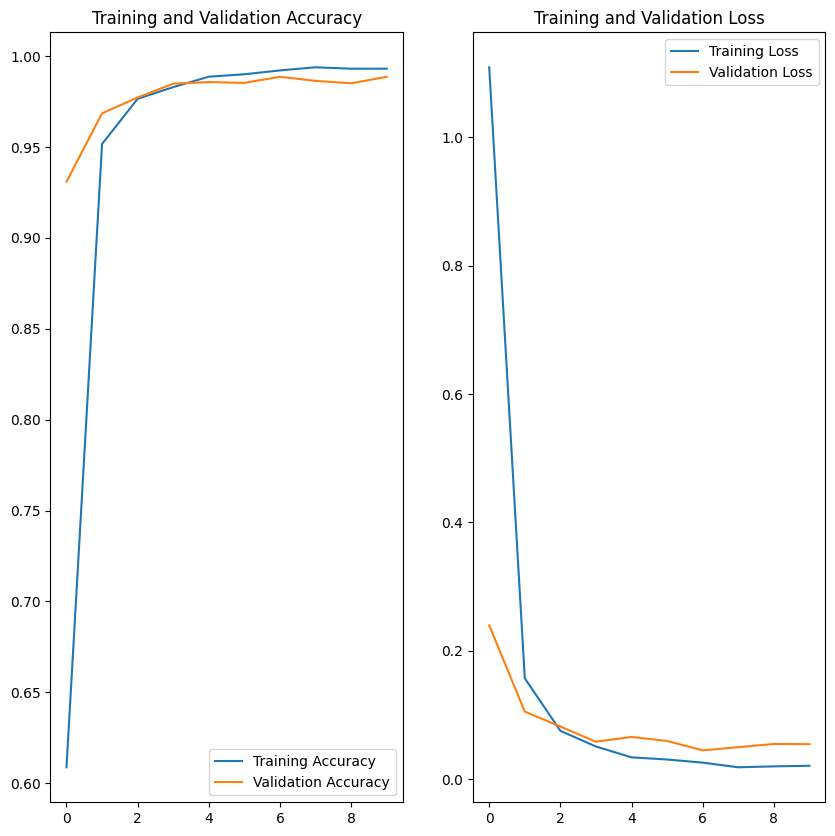

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = history.epoch

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
test_data = image_dataset_from_directory(
    '/content/drive/MyDrive/Project/Dataset/Test',
    batch_size = 128,
    image_size=(100,100),
    labels = None,
    label_mode=None,
    shuffle = False
)


Found 79833 files belonging to 1 classes.


In [ ]:
def predict_image(path):
    img = tf.keras.utils.load_img(path).resize((100,100))
    img = np.array(img).reshape((1,100,100,3))
    y = model.predict(img,verbose=False)
    return y

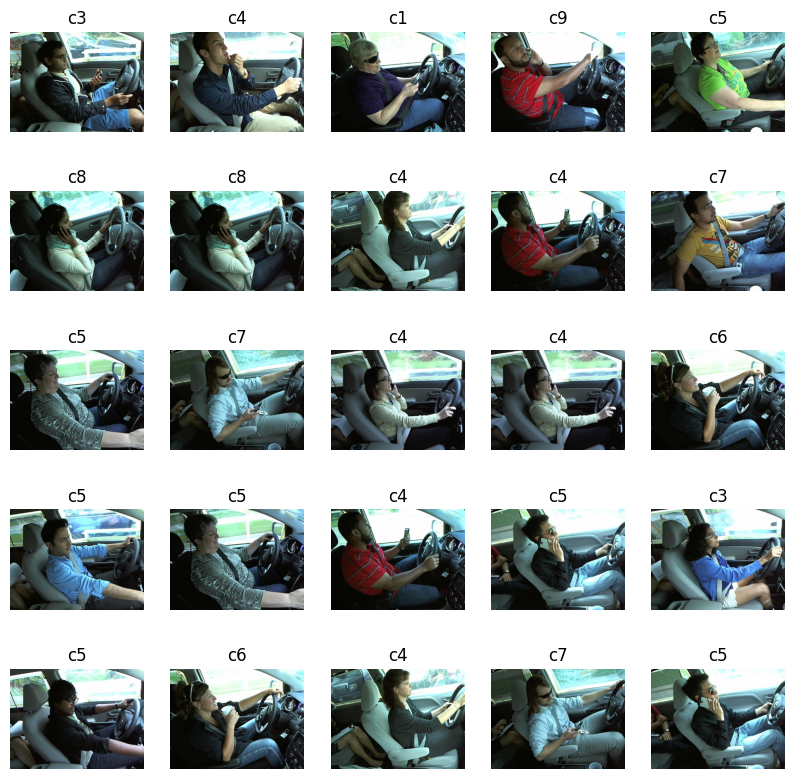

In [ ]:
test_path = '/content/drive/MyDrive/Project/Dataset/Test'
plt.figure(figsize=(10,10))
i=1
for img_path in os.listdir(test_path)[:25]:
    img_path = os.path.join(test_path,img_path)
    img = tf.keras.utils.load_img(img_path)
    ax = plt.subplot(5, 5, i)
    plt.imshow(img)
    plt.title('c'+str(predict_image(img_path).argmax()))
    plt.axis("off")
    i += 1

In [ ]:
y = model.predict(test_data)

In [ ]:
y.shape

In [ ]:
df = pd.DataFrame(y)
df.columns = ["SAFE_DRIVING", "TEXTING_RIGHT", "TALKING_PHONE_RIGHT", "TEXTING_LEFT", "TALKING_PHONE_LEFT", "OPERATING_RADIO", "DRINKING", "REACHING_BEHIND", "HAIR_AND_MAKEUP", "TALKING_TO_PASSENGER"]
filepath = [i.split('/')[-1] for i in test_data.file_paths]
df1 = pd.DataFrame(filepath)
df1.columns = ['img']
df = df1.join(df)
df.to_csv('/content/drive/MyDrive/Project/Models/output.csv',index=False)

In [ ]:
df.head()

In [ ]:
model.summary

In [ ]:
df.info()

In [ ]:
model.save('/content/drive/MyDrive/Project/Models/model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
